# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
!pip install citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     - ----------------------------------- 20.5/675.6 kB 217.9 kB/s eta 0:00:04
     - ----------------------------------- 30.7/675.6 kB 217.9 kB/s eta 0:00:03
     -- ---------------------------------- 51.2/675.6 kB 290.5 kB/s eta 0:00:03
     ----- ------------------------------ 102.4/675.6 kB 490.2 kB/s eta 0:00:02
     -------------- ----------------------- 266.2/675.6 kB 1.1 MB/s eta 0:00:01
     ----------------------------- -------- 532.5/675.6 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=14a88c689ff0ff26ec0e25734361d694cbbefcb94d37dae80f7597201a5480b7
  Stored in directory: c:\users\bdhai\ap

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
import requests
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid=13b60ee14e4c6cc92982c9ddb65a5460&units=metric"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the city information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dokkum
City not found. Skipping...
Processing Record 2 of Set 1 | grytviken
City not found. Skipping...
Processing Record 3 of Set 1 | kailua-kona
City not found. Skipping...
Processing Record 4 of Set 1 | bridport
City not found. Skipping...
Processing Record 5 of Set 1 | carutapera
City not found. Skipping...
Processing Record 6 of Set 1 | georgetown
City not found. Skipping...
Processing Record 7 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 8 of Set 1 | nova xavantina
City not found. Skipping...
Processing Record 9 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | adamstown
City not found. Skipping...
Processing Record 12 of Set 1 | port saint john's
City not found. Skipping...
Processing Record 13 of Set 1 | port elizabeth
City not found. Skipping...
Processing 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          291
Lat           291
Lng           291
Max Temp      291
Humidity      291
Cloudiness    291
Wind Speed    291
Country       291
Date          291
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coronel du graty,-27.6804,-60.9146,30.20,36,56,4.09,AR,1741064863
1,aginskoye,51.1000,114.5300,-4.18,70,42,3.03,RU,1741064864
2,caconda,-13.7333,15.0667,15.28,78,82,1.14,AO,1741064865
3,arteche,12.2645,125.4048,29.17,70,100,3.50,PH,1741064866
4,pacific grove,36.6177,-121.9166,10.37,88,99,1.79,US,1741064867


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:/Users/bdhai/Downloads/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv(r"C:/Users/bdhai/Downloads/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coronel du graty,-27.6804,-60.9146,30.20,36,56,4.09,AR,1741064863
1,aginskoye,51.1000,114.5300,-4.18,70,42,3.03,RU,1741064864
2,caconda,-13.7333,15.0667,15.28,78,82,1.14,AO,1741064865
3,arteche,12.2645,125.4048,29.17,70,100,3.50,PH,1741064866
4,pacific grove,36.6177,-121.9166,10.37,88,99,1.79,US,1741064867


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

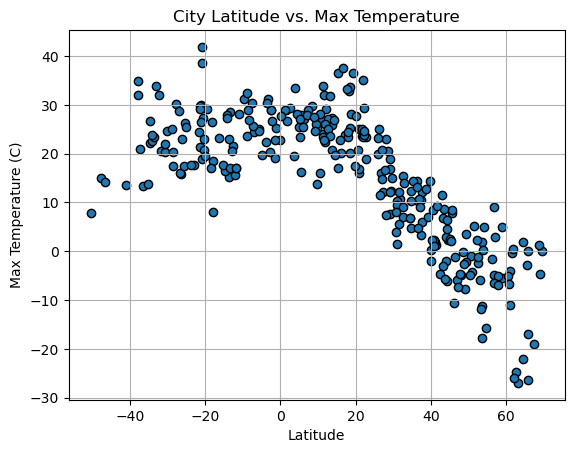

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:/Users/bdhai/Downloads/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

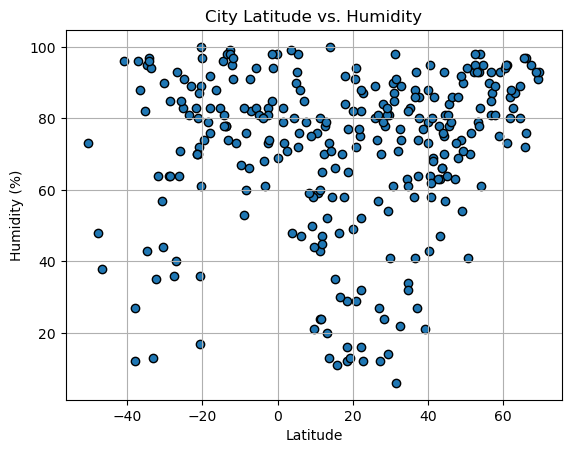

In [32]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:/Users/bdhai/Downloads/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

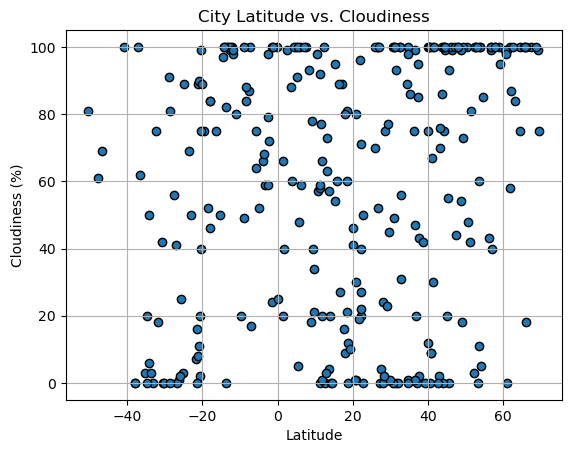

In [34]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:/Users/bdhai/Downloads/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

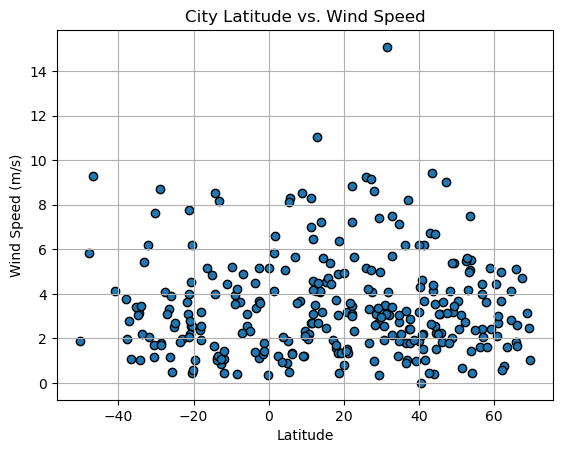

In [36]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:/Users/bdhai/Downloads/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
import scipy.stats as st

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coord):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, coord, fontsize=15, color="red")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,aginskoye,51.1000,114.5300,-4.18,70,42,3.03,RU,1741064864
3,arteche,12.2645,125.4048,29.17,70,100,3.50,PH,1741064866
4,pacific grove,36.6177,-121.9166,10.37,88,99,1.79,US,1741064867
5,lang son,21.8333,106.7333,23.63,75,96,3.11,VN,1741064868
6,rongelap,11.1635,166.8941,26.91,80,0,8.31,MH,1741064869


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coronel du graty,-27.6804,-60.9146,30.20,36,56,4.09,AR,1741064863
2,caconda,-13.7333,15.0667,15.28,78,82,1.14,AO,1741064865
7,orapa,-21.2833,25.3667,21.34,70,89,3.98,BW,1741064870
8,tome,-36.6167,-72.9500,13.34,88,62,1.08,CL,1741064901
16,sao joao da barra,-21.6403,-41.0511,24.50,83,7,3.65,BR,1741064910


###  Temperature vs. Latitude Linear Regression Plot

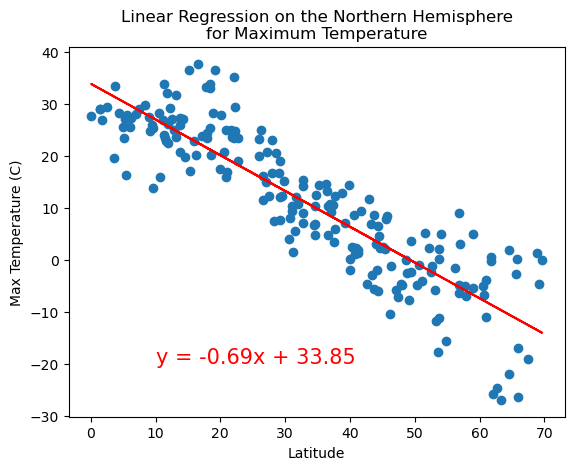

In [62]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Linear Regression on the Northern Hemisphere\nfor Maximum Temperature", 
                       "Latitude", "Max Temperature (C)", (10, -20))

The r^2-value is: 0.6720220238897325


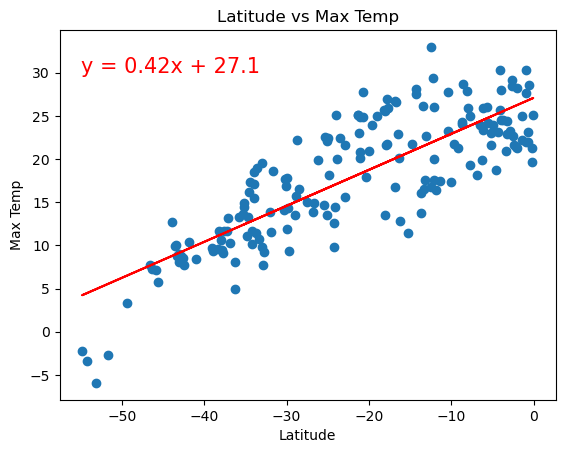

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Linear Regression on the Southern Hemisphere\nfor Maximum Temperature", 
                       "Latitude", "Max Temperature (C)", (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

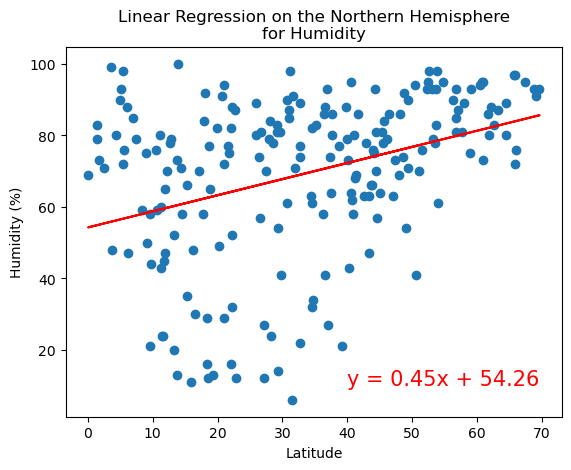

In [64]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Linear Regression on the Northern Hemisphere\nfor Humidity", 
                       "Latitude", "Humidity (%)", (40, 10))

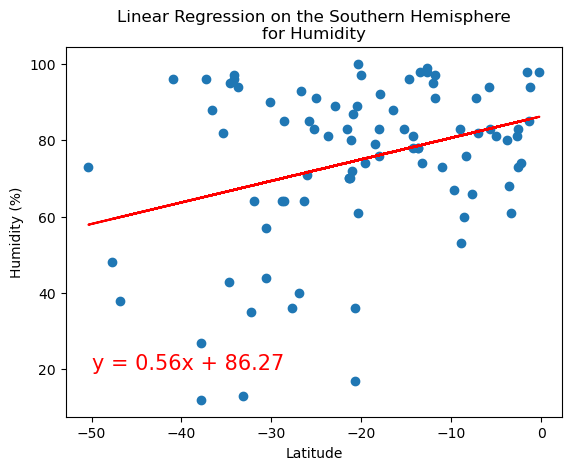

In [66]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Linear Regression on the Southern Hemisphere\nfor Humidity", 
                       "Latitude", "Humidity (%)", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

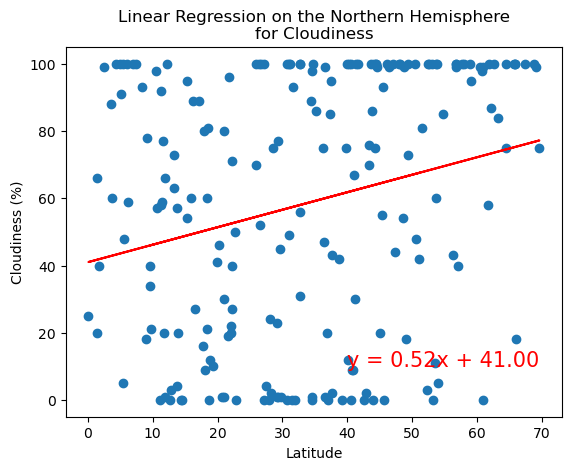

In [68]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Linear Regression on the Northern Hemisphere\nfor Cloudiness", 
                       "Latitude", "Cloudiness (%)", (40, 10))

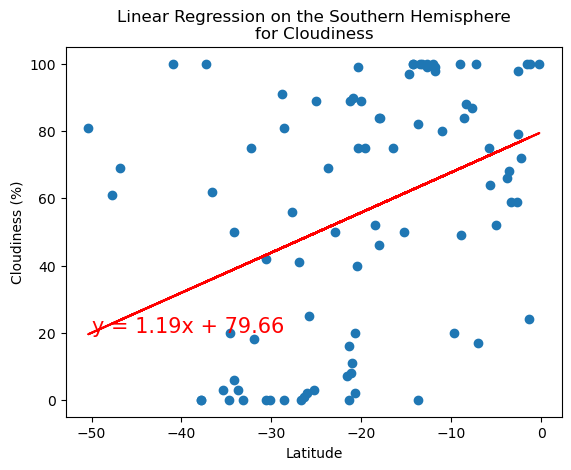

In [70]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Linear Regression on the Southern Hemisphere\nfor Cloudiness", 
                       "Latitude", "Cloudiness (%)", (-50, 20))



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

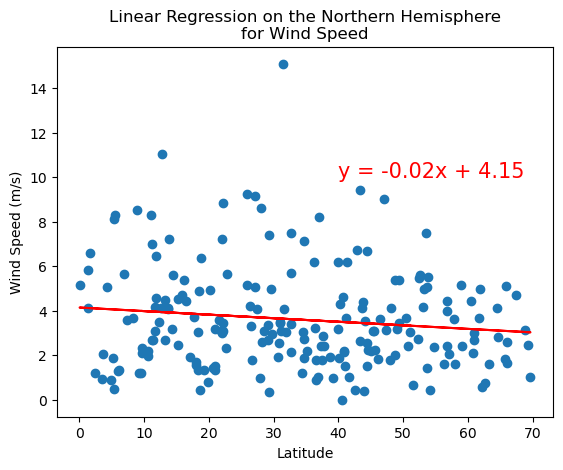

In [72]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Linear Regression on the Northern Hemisphere\nfor Wind Speed", 
                       "Latitude", "Wind Speed (m/s)", (40, 10))

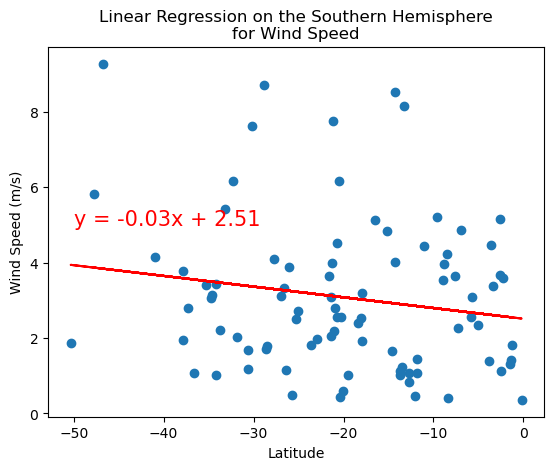

In [74]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Linear Regression on the Southern Hemisphere\nfor Wind Speed", 
                       "Latitude", "Wind Speed (m/s)", (-50, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Minimal to no correlation between latitude and wind speed